# "화성시-최적-시내버스-노선-제시"
> "https://compas.lh.or.kr/subj/past/info?subjNo=SBJ_1910_001"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Yunjihye
- categories: [jupyter, python]

# 화성시 최적 시내버스 노선 제시

* [1 개요](#chapter1)
    * [1.1 배경](#section_1_1)
    * [1.2 동기](#section_1_2)
    * [1.3 목적](#section_1_3)
* [2 데이터](#chapter2)
    * [2.1 데이터 설명](#section_2_1)
    * [2.2 데이터 전처리 & EDA](#section_2_2)
* [3 결론](#chapter3)
    * [3.1 요약](#section_3_1)
    * [3.2 한계점](#section_3_2)

In [9]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 개요 <a class="anchor" id="chapter1"></a>

## 1.1 배경 <a class="anchor" id="section_1_1"></a>

화성시는 전국 기초단체 중 가장 공장이 많은 지역이며 
동탄, 병점 등 신도시의 입주로 인해 
2018년 한해 동안 인구가 가장 많이 증가한 지자체로 
이에 따른 교통문제가 심각한 실정이다.

![인구](img/그림1.png)
![뉴스](img/그림2.png)

## 1.2 동기 <a class="anchor" id="section_1_2"></a>

- 시민  체감형  맞춤형  교통대책을  마련하기  위해 실효성  있는  정책  마련을  통해 고질적인  교통난  해소하기 위해

- 교통난 해소를 위해 늘어난 2층 버스 노선 제시하기 위해

![인구](img/그림3.png)
![뉴스](img/그림4.png)
![뉴스](img/그림5.png)
![뉴스](img/그림6.png)

## 1.3 목적 <a class="anchor" id="section_1_3"></a>

화성시내 인구와 이동 형태를 고려하여 
관내 시내버스에 대한 노선 신설이나 기존 노선의 개선하기

# 2 데이터 <a class="anchor" id="chapter2"></a>

## 2.1 데이터 설명 <a class="anchor" id="section_2_1"></a>

### 첫번째 데이터
TripChain.csv

- 2018년 7월 승차일 기준 1~4일의 버스 카드태깅 정보

In [2]:
TripChain = pd.read_csv('TripChain.csv')
TripChain.head()

,암호화카드번호||','||트랜잭션ID||','||환승횟수||','||교통카드발행사ID||','||총이용객수||','||사용자구분||','||교통수단CD1||','||교통수단CD2||','||교통수단CD3||','||교통수단CD4||',...,'||하차역ID1||','||하차역ID2||','||하차역ID3||','||하차역ID4||','||하차역ID5||','||최초승차역ID||','||최종하차역ID||','||총이용금액||','||수집건수||','||트립체인완료코드
0,900079696430,56,2,9000923,1,1,500.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4116708.0,1350,2,;
1,900079697651,5,1,9000923,1,1,500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4117269.0,1250,1,;
2,900079698254,32,1,9000923,1,1,500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4107936.0,1550,1,;
3,900079699257,80,1,9000923,1,1,500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4116717.0,1250,1,;
4,900079701419,64,1,9000923,1,1,530.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4116848.0,2050,1,;


### 두번째 데이터
stations_table.csv

- 17~18년 기준, 경기도 버스 정류장에 대한 정보

In [3]:
stations = pd.read_csv('stations_table.csv')
stations.head()

,표준정류장ID,시군명,정류소명,정류소영문명,정류소번호,중앙차로여부,관할관청,위치,WGS84위도,WGS84경도,모바일정류장ID,이비카드정류장ID
0,228003422,용인시,손골마을회관.국제학교,"Songol Community Center,",56443.0,노변정류장,경기도 용인시,NaN,37.342517,127.066817,56443.0,NaN
1,228003423,용인시,풀잎사랑,Pulipsarang,56444.0,노변정류장,경기도 용인시,NaN,37.341800,127.068983,56444.0,NaN
2,228003424,용인시,풀잎사랑,Pulipsarang,56445.0,노변정류장,경기도 용인시,NaN,37.341817,127.069083,56445.0,NaN
3,228003425,용인시,대성공정,Daesung Process,56446.0,노변정류장,경기도 용인시,NaN,37.339350,127.073067,56446.0,NaN
4,228003426,용인시,대성공정,Daesung Process,56447.0,노변정류장,경기도 용인시,NaN,37.339183,127.073400,56447.0,NaN


### 세번째 데이터
routestationinfo.csv

- 버스노선-정류장 매핑 테이블 정보

- columns 이름

    seq : 순번

    pr_station_id : 노선 ID

    bus_line_no : 버스 노선 번호

    bus_line_no_seq : 버스 라인 정류장 순서

    station_nm : 정류장 명칭

    station_id : 표준 정류장ID

    mobile_no : 모바일정류장ID

In [4]:
routestationinfo = pd.read_csv('routestationinfo.csv')
routestationinfo.head()

,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no
0,65286,228000018,10-4,1,용인터미널,228001552,47634.0
1,65287,228000018,10-4,2,용인터미널(경유),277102443,NaN
2,65288,228000018,10-4,3,포브스병원,228000443,29439.0
3,65289,228000018,10-4,4,제일교회,228000665,29881.0
4,65290,228000018,10-4,5,라이프아파트,228000664,29457.0


### 네번째 데이터(데이터 추가 수집)
경기도 화성시_인구 현황

- 화성시 읍면동별, 남녀별 인구 현황

In [5]:
hwaseong = pd.read_csv('화성시 인구 현황.csv', encoding='cp949')
hwaseong.head()

,읍면동,세대수,인 구 수,남,여,전월말 인구수,전년 12월말 인구수,인구 전월말,인구 전년동기,세대 전월말,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,봉담읍,26756.0,74009.0,37410.0,36599.0,73945.0,70163.0,64.0,3846.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,우정읍,8331.0,18107.0,9715.0,8392.0,18091.0,18030.0,16.0,77.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,향남읍,34039.0,80328.0,42559.0,37769.0,79993.0,74856.0,335.0,5472.0,201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,남양읍,14313.0,32298.0,17378.0,14920.0,32191.0,28810.0,107.0,3488.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,매송면,3640.0,8033.0,4202.0,3831.0,8062.0,8259.0,-29.0,-226.0,-5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 데이터 전처리 & EDA <a class="anchor" id="section_2_2"></a>

# 1. 경기도 화성시 읍·면·동 별 인구 현황

 - 어느 위치에 인구가 많은지 확인

In [6]:
hwaseong = pd.read_csv('화성시 인구 현황.csv', encoding='cp949')
hwaseong.head()

,읍면동,세대수,인 구 수,남,여,전월말 인구수,전년 12월말 인구수,인구 전월말,인구 전년동기,세대 전월말,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,봉담읍,26756.0,74009.0,37410.0,36599.0,73945.0,70163.0,64.0,3846.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,우정읍,8331.0,18107.0,9715.0,8392.0,18091.0,18030.0,16.0,77.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,향남읍,34039.0,80328.0,42559.0,37769.0,79993.0,74856.0,335.0,5472.0,201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,남양읍,14313.0,32298.0,17378.0,14920.0,32191.0,28810.0,107.0,3488.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,매송면,3640.0,8033.0,4202.0,3831.0,8062.0,8259.0,-29.0,-226.0,-5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 결측값 제거
hwaseong.dropna(subset=['인 구 수'], inplace=True)

2016년 12월 말 화성시 읍면동별 인구수 순위

In [8]:
hwaseong_1=hwaseong.sort_values('전년 12월말 인구수', ascending=False)
label = [i.strip() for i in hwaseong['읍면동'].to_list()]
label

['봉담읍',
 '우정읍',
 '향남읍',
 '남양읍',
 '매송면',
 '비봉면',
 '마도면',
 '송산면',
 '서신면',
 '팔탄면',
 '장안면',
 '양감면',
 '정남면',
 '동탄면',
 '진안동',
 '병점1동',
 '병점2동',
 '반월동',
 '기배동',
 '화산동',
 '동탄1동',
 '동탄2동',
 '동탄3동',
 '동탄4동']

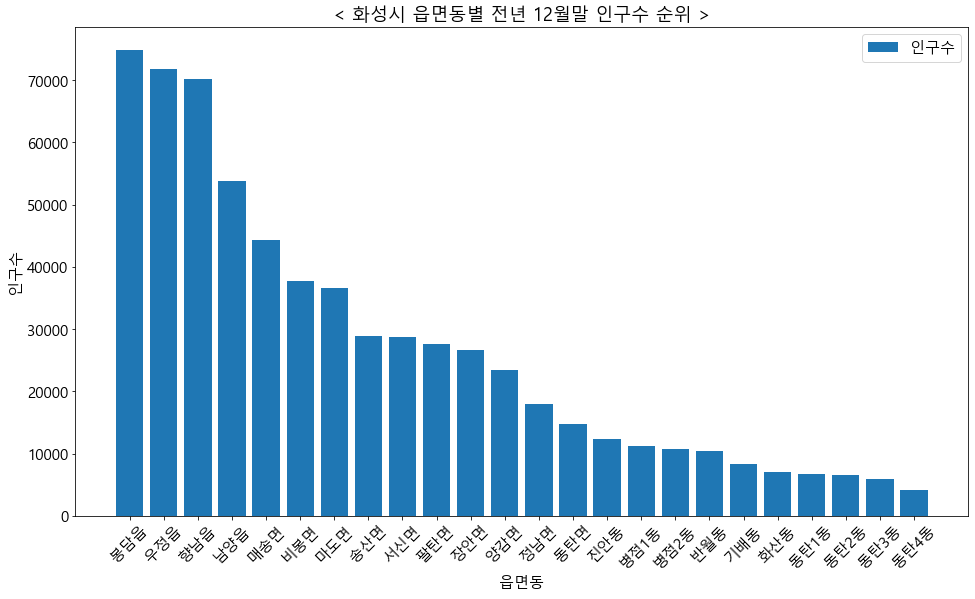

<Figure size 2304x1152 with 0 Axes>

In [10]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 15

plt.rc('font', family='Malgun Gothic') 


on = hwaseong['전년 12월말 인구수'].sort_values(ascending = False)

x = np.arange(len(label))

plt.bar(x-0.0, on, label='인구수')
plt.xticks(x, label)

plt.legend()
plt.xlabel('읍면동')
plt.ylabel('인구수')
plt.xticks(rotation = 45)
plt.title('< 화성시 읍면동별 전년 12월말 인구수 순위 >')
plt.figure(figsize=(32, 16))

plt.show() 

2017년 12월 말 화성시 읍면동별 인구수 순위

In [11]:
hwaseong1=hwaseong.sort_values('인 구 수', ascending=False)
label = [i.strip() for i in hwaseong1['읍면동'].to_list()]
label

['동탄4동',
 '향남읍',
 '봉담읍',
 '동탄1동',
 '동탄3동',
 '진안동',
 '동탄2동',
 '남양읍',
 '반월동',
 '병점1동',
 '병점2동',
 '화산동',
 '동탄면',
 '우정읍',
 '기배동',
 '정남면',
 '송산면',
 '장안면',
 '팔탄면',
 '매송면',
 '서신면',
 '마도면',
 '비봉면',
 '양감면']

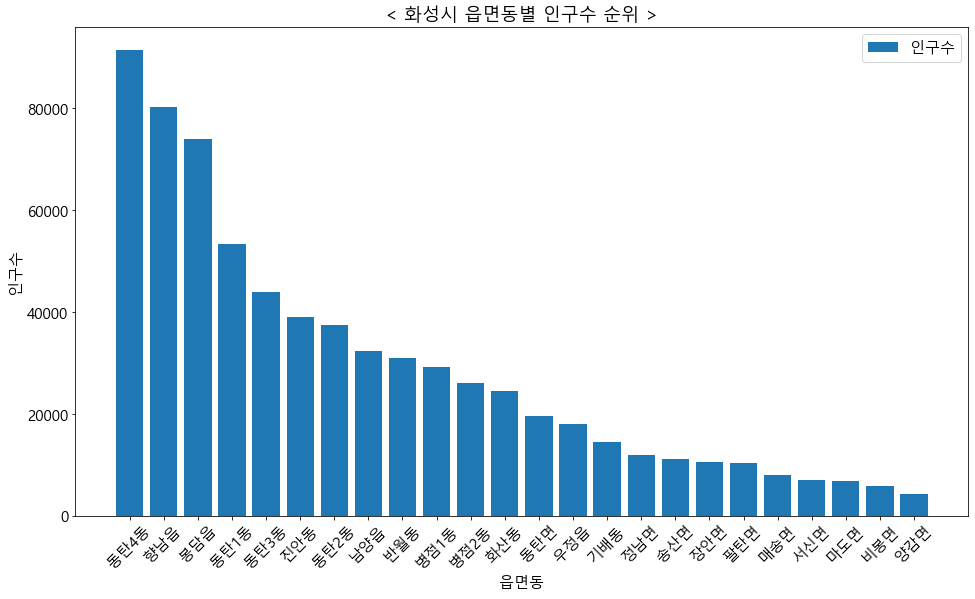

<Figure size 2304x1152 with 0 Axes>

In [12]:
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 15

on = hwaseong['인 구 수'].sort_values(ascending = False)

x = np.arange(len(label))

plt.bar(x-0.0, on, label='인구수')
plt.xticks(x, label)

plt.legend()
plt.xlabel('읍면동')
plt.ylabel('인구수')
plt.xticks(rotation = 45)
plt.title('< 화성시 읍면동별 인구수 순위 >')
plt.figure(figsize=(32, 16))

plt.show() 

### 동탄신도시가 개발 되면서 2016년에 비해 2017년 인구수 증가하였고, 동탄 4동이 인구가 가장 많다

# 2. 화성시 관내 버스정류장 분포 현황
- 17~18년 기준 화성시 버스 정류장

- 화성시 내의 버스정류장이 어디에 몰려있고, 얼마나 있는지 확인

In [13]:
stations = pd.read_csv('stations_table.csv')
stations.head()

,표준정류장ID,시군명,정류소명,정류소영문명,정류소번호,중앙차로여부,관할관청,위치,WGS84위도,WGS84경도,모바일정류장ID,이비카드정류장ID
0,228003422,용인시,손골마을회관.국제학교,"Songol Community Center,",56443.0,노변정류장,경기도 용인시,NaN,37.342517,127.066817,56443.0,NaN
1,228003423,용인시,풀잎사랑,Pulipsarang,56444.0,노변정류장,경기도 용인시,NaN,37.341800,127.068983,56444.0,NaN
2,228003424,용인시,풀잎사랑,Pulipsarang,56445.0,노변정류장,경기도 용인시,NaN,37.341817,127.069083,56445.0,NaN
3,228003425,용인시,대성공정,Daesung Process,56446.0,노변정류장,경기도 용인시,NaN,37.339350,127.073067,56446.0,NaN
4,228003426,용인시,대성공정,Daesung Process,56447.0,노변정류장,경기도 용인시,NaN,37.339183,127.073400,56447.0,NaN


In [14]:
# 필요한 column 값만 추려내기.
stations_col = stations[['표준정류장ID', '이비카드정류장ID', '관할관청']]
stations_col.head()

,표준정류장ID,이비카드정류장ID,관할관청
0,228003422,NaN,경기도 용인시
1,228003423,NaN,경기도 용인시
2,228003424,NaN,경기도 용인시
3,228003425,NaN,경기도 용인시
4,228003426,NaN,경기도 용인시


In [15]:
# 결측값 확인
stations_col.isna().sum()

표준정류장ID          0
이비카드정류장ID    12542
관할관청          6558
dtype: int64

In [16]:
# 결측값 제거
stations_col.dropna(subset = ['이비카드정류장ID'], inplace = True)

C:\Users\Yunjihye\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
from tqdm import tqdm

# 17~18년 기준 경기도 버스 정류장에 대한 정보(PJT001_stations_table.csv)와 버스노선-정류장 매핑 테이블 정보(PJT001_routestationinfo.csv) 결합
routestationinfo2 = routestationinfo

station_ids = list(routestationinfo['station_id'])
station_prids = list(stations['표준정류장ID'])

station_wgs84_latiude = list(stations['WGS84위도'])
station_wgs84_longitude = list(stations['WGS84경도'])

latitude = []
longitude = []

for i in tqdm(range(len(station_ids))):
  for j in range(len(station_prids)):
    if station_ids[i] == station_prids[j]:
      latitude.append(station_wgs84_latiude[j])
      longitude.append(station_wgs84_longitude[j])
      break

print(latitude[:3], longitude[:3])
routestationinfo2['latitude'] = latitude
routestationinfo2['longitude'] = longitude

routestationinfo2

100%|███████████████████████████████████████████████████████████████████████████| 37831/37831 [03:36<00:00, 174.69it/s]

[37.2327833, 37.23535, 37.2352667] [127.2101, 127.2090333, 127.21061670000002]


,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,latitude,longitude
0,65286,228000018,10-4,1,용인터미널,228001552,47634.0,37.232783,127.210100
1,65287,228000018,10-4,2,용인터미널(경유),277102443,NaN,37.235350,127.209033
2,65288,228000018,10-4,3,포브스병원,228000443,29439.0,37.235267,127.210617
3,65289,228000018,10-4,4,제일교회,228000665,29881.0,37.234300,127.213333
4,65290,228000018,10-4,5,라이프아파트,228000664,29457.0,37.231483,127.213767
...,...,...,...,...,...,...,...,...,...
37826,191750,241491011,38-1,63,신일해피트리후문,233002733,NaN,37.222650,126.978983
37827,191751,241491011,38-1,64,기배동행정복지센터,233002726,NaN,37.224000,126.983150
37828,191752,241491011,38-1,65,기안1통입구,233002959,NaN,37.225683,126.986250
37829,191753,241491011,38-1,66,배양2리,233002717,55455.0,37.226833,126.992067


In [26]:
# 결합한 데이터를 csv로 새로운 데이터 만들기
routestationinfo2.to_csv("combine_info_table.csv", index=False)

In [18]:
combined = pd.read_csv('combine_info_table.csv')
combined.drop(combined.columns[0], axis = 1)
combined.head()

,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,latitude,longitude
0,65286,228000018,10-4,1,용인터미널,228001552,47634.0,37.232783,127.210100
1,65287,228000018,10-4,2,용인터미널(경유),277102443,NaN,37.235350,127.209033
2,65288,228000018,10-4,3,포브스병원,228000443,29439.0,37.235267,127.210617
3,65289,228000018,10-4,4,제일교회,228000665,29881.0,37.234300,127.213333
4,65290,228000018,10-4,5,라이프아파트,228000664,29457.0,37.231483,127.213767


In [19]:
# 필요한 column의 이름 바꿔주기
combined = combined[['bus_line_no', 'station_nm', 'latitude', 'longitude', 'station_id']]
combined.columns = ['노선번호', '정류장이름', '위도', '경도', '표준정류장ID']
combined.head()

,노선번호,정류장이름,위도,경도,표준정류장ID
0,10-4,용인터미널,37.232783,127.210100,228001552
1,10-4,용인터미널(경유),37.235350,127.209033,277102443
2,10-4,포브스병원,37.235267,127.210617,228000443
3,10-4,제일교회,37.234300,127.213333,228000665
4,10-4,라이프아파트,37.231483,127.213767,228000664


In [20]:
#  station 데이터와 combined 데이터 결합
re_combined = pd.merge(combined, stations_col, on = '표준정류장ID')
re_combined.head()

,노선번호,정류장이름,위도,경도,표준정류장ID,이비카드정류장ID,관할관청
0,10-4,용인터미널,37.232783,127.2101,228001552,4176783.0,경기도 용인시
1,10-4,용인터미널,37.232783,127.2101,228001552,9176783.0,경기도 용인시
2,7,용인터미널,37.232783,127.2101,228001552,4176783.0,경기도 용인시
3,7,용인터미널,37.232783,127.2101,228001552,9176783.0,경기도 용인시
4,8,용인터미널,37.232783,127.2101,228001552,4176783.0,경기도 용인시


In [21]:
# 관할관청이 경기도 화성시인 데이터만 추출
re_combined = re_combined[re_combined['관할관청'] == '경기도 화성시']
re_combined.head()

,노선번호,정류장이름,위도,경도,표준정류장ID,이비카드정류장ID,관할관청
1522,24,한원IC,37.152733,127.122883,233000169,4170725.0,경기도 화성시
1523,24,장지동,37.155117,127.117900,233000168,4170397.0,경기도 화성시
1524,19-2,장지동,37.155117,127.117900,233000168,4170397.0,경기도 화성시
1525,39,장지동,37.155117,127.117900,233000168,4170397.0,경기도 화성시
1526,24,장지동,37.155867,127.115017,233000167,4170396.0,경기도 화성시


In [22]:
# 한 정류장에 여러 노선이 있기 때문에 정류장 정보만 얻기 위해 노선번호 열을 삭제하고, 중복값을 제거
re_combined = re_combined.drop(re_combined.columns[0], axis = 1)
final_combined = re_combined.drop_duplicates()
final_combined.head()

,정류장이름,위도,경도,표준정류장ID,이비카드정류장ID,관할관청
1522,한원IC,37.152733,127.122883,233000169,4170725.0,경기도 화성시
1523,장지동,37.155117,127.117900,233000168,4170397.0,경기도 화성시
1526,장지동,37.155867,127.115017,233000167,4170396.0,경기도 화성시
1529,꽃가마약수터,37.159100,127.099350,233000166,4170395.0,경기도 화성시
1607,꽃가마약수터,37.158900,127.098750,233001323,4170651.0,경기도 화성시


In [23]:
# 화성시 관내의 정류장 위치를 Folium을 사용하여 시각화
import folium
from folium.plugins import MarkerCluster, MiniMap

In [24]:
# 각 버스 정류소의 위도, 경도 값을 받아 해당 위치에 marker 표시
map_bus = folium.Map((37.1995439, 126.8311358), zoom_start = 11)
mc = MarkerCluster()

for row in final_combined.itertuples():
    mc.add_child(folium.Marker(location = [row.위도, row.경도], popup = row.정류장이름))
    map_bus.add_child(mc)
map_bus

### 병점동과 동탄동에 버스 정류장이 많다

# 3. 화성시 버스 정류장 이용 파악
- 버스 승객분들이 버스를 가장 많이 탑승한 때, 어디 정류장에서 승하차를 많이 하는지 확인

- 버스 승객분들이 버스를 가장 많이 탑승한 때, 어느 위치(읍·면·동)에서 승하차를 많이 하는지 확인

In [41]:
import plotly
import os

import geopandas as gpd
from geopy.distance import distance, lonlat

import plotly.plotly as py
import cufflinks as cf 
cf.go_offline(connected=True)
cf.set_config_file(theme='polar')
import deckgljupyter.Layer as deckgl

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from tqdm import tqdm_notebook
plotly.__version__

import networkx as nx

from tqdm import tqdm_notebook
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [71]:
df_tripchain = pd.read_csv('TripChain.csv')
df_tripchain.head()

,암호화카드번호||','||트랜잭션ID||','||환승횟수||','||교통카드발행사ID||','||총이용객수||','||사용자구분||','||교통수단CD1||','||교통수단CD2||','||교통수단CD3||','||교통수단CD4||','||교통수단CD5||','||버스노선ID1||','||버스노선ID2||','||버스노선ID3||','||버스노선ID4||','||버스노선ID5||','||차량ID1||','||차량ID2||','||차량ID3||','||차량ID4||','||차량ID5||','||총통행거리||','||총탑승시간||','||총소요시간||','||승차일시1||','||승차일시2||','||승차일시3||','||승차일시4||','||승차일시5||','||하차일시1||','||하차일시2||','||하차일시3||','||하차일시4||','||하차일시5||','||최초승차일시||','||최종하차일시||','||승차역ID1||','||승차역ID2||','||승차역ID3||','||승차역ID4||','||승차역ID5||','||하차역ID1||','||하차역ID2||','||하차역ID3||','||하차역ID4||','||하차역ID5||','||최초승차역ID||','||최종하차역ID||','||총이용금액||','||수집건수||','||트립체인완료코드
0,900079696430,56,2,9000923,1,1,500.0,500.0,NaN,NaN,NaN,41002045.0,41002044.0,NaN,NaN,NaN,141771735.0,141771587.0,NaN,NaN,NaN,11170,25,25,2.018070e+13,2.018070e+13,NaN,NaN,NaN,2.018070e+13,2.018070e+13,NaN,NaN,NaN,20180701052543,20180701064826,4116828.0,4150144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116708.0,1350,2,;
1,900079697651,5,1,9000923,1,1,500.0,NaN,NaN,NaN,NaN,41031040.0,NaN,NaN,NaN,NaN,141701792.0,NaN,NaN,NaN,NaN,1700,3,3,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701072156,20180701072520,4117280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4117269.0,1250,1,;
2,900079698254,32,1,9000923,1,1,500.0,NaN,NaN,NaN,NaN,41031121.0,NaN,NaN,NaN,NaN,141701843.0,NaN,NaN,NaN,NaN,23180,66,66,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701123653,20180701134223,4199619.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4107936.0,1550,1,;
3,900079699257,80,1,9000923,1,1,500.0,NaN,NaN,NaN,NaN,41031013.0,NaN,NaN,NaN,NaN,141701450.0,NaN,NaN,NaN,NaN,500,1,1,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701224424,20180701224543,4108130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116717.0,1250,1,;
4,900079701419,64,1,9000923,1,1,530.0,NaN,NaN,NaN,NaN,41020001.0,NaN,NaN,NaN,NaN,141703985.0,NaN,NaN,NaN,NaN,3240,8,8,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701085058,20180701085910,4100122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116848.0,2050,1,;


In [72]:
# column 이름 바꿔주기
columns_0 =[]
for col in df_tripchain.columns: 
    columns_0.append(col.replace('||', ''))
columns=[]
for col in columns_0: 
    columns.append(col.replace("'",''))
df_tripchain.columns = columns


df_tripchain.head()

,암호화카드번호,트랜잭션ID,환승횟수,교통카드발행사ID,총이용객수,사용자구분,교통수단CD1,교통수단CD2,교통수단CD3,교통수단CD4,교통수단CD5,버스노선ID1,버스노선ID2,버스노선ID3,버스노선ID4,버스노선ID5,차량ID1,차량ID2,차량ID3,차량ID4,차량ID5,총통행거리,총탑승시간,총소요시간,승차일시1,승차일시2,승차일시3,승차일시4,승차일시5,하차일시1,하차일시2,하차일시3,하차일시4,하차일시5,최초승차일시,최종하차일시,승차역ID1,승차역ID2,승차역ID3,승차역ID4,승차역ID5,하차역ID1,하차역ID2,하차역ID3,하차역ID4,하차역ID5,최초승차역ID,최종하차역ID,총이용금액,수집건수,트립체인완료코드
0,900079696430,56,2,9000923,1,1,500.0,500.0,NaN,NaN,NaN,41002045.0,41002044.0,NaN,NaN,NaN,141771735.0,141771587.0,NaN,NaN,NaN,11170,25,25,2.018070e+13,2.018070e+13,NaN,NaN,NaN,2.018070e+13,2.018070e+13,NaN,NaN,NaN,20180701052543,20180701064826,4116828.0,4150144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116708.0,1350,2,;
1,900079697651,5,1,9000923,1,1,500.0,NaN,NaN,NaN,NaN,41031040.0,NaN,NaN,NaN,NaN,141701792.0,NaN,NaN,NaN,NaN,1700,3,3,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701072156,20180701072520,4117280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4117269.0,1250,1,;
2,900079698254,32,1,9000923,1,1,500.0,NaN,NaN,NaN,NaN,41031121.0,NaN,NaN,NaN,NaN,141701843.0,NaN,NaN,NaN,NaN,23180,66,66,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701123653,20180701134223,4199619.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4107936.0,1550,1,;
3,900079699257,80,1,9000923,1,1,500.0,NaN,NaN,NaN,NaN,41031013.0,NaN,NaN,NaN,NaN,141701450.0,NaN,NaN,NaN,NaN,500,1,1,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701224424,20180701224543,4108130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116717.0,1250,1,;
4,900079701419,64,1,9000923,1,1,530.0,NaN,NaN,NaN,NaN,41020001.0,NaN,NaN,NaN,NaN,141703985.0,NaN,NaN,NaN,NaN,3240,8,8,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701085058,20180701085910,4100122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116848.0,2050,1,;


In [73]:
# '일시'가 들어간 column 뽑기
time_cols = [col for col in df_tripchain.columns if "일시" in col]

In [74]:
# 결측값 제거
df_tripchain[time_cols].head()
df_tripchain['최초승차일시'] = df_tripchain['최초승차일시'].astype('object')
df_tripchain['최초승차일시'] = df_tripchain['최초승차일시'].astype('str')
df_tripchain['최초승차일시'] = pd.to_datetime(df_tripchain['최초승차일시'], errors='coerce')

df_tripchain.dropna(subset=['최종하차일시'], inplace=True)
df_tripchain.dropna(subset=['승차역ID1'], inplace=True)

,승차일시1,승차일시2,승차일시3,승차일시4,승차일시5,하차일시1,하차일시2,하차일시3,하차일시4,하차일시5,최초승차일시,최종하차일시
0,2.018070e+13,2.018070e+13,NaN,NaN,NaN,2.018070e+13,2.018070e+13,NaN,NaN,NaN,20180701052543,20180701064826
1,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701072156,20180701072520
2,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701123653,20180701134223
3,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701224424,20180701224543
4,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,20180701085058,20180701085910


#### 버스 승차 많이 한 날 확인

In [75]:
df_tripchain['최초승차일시'].dt.day.value_counts()

3    404485
2    365019
1    181021
4     98016
Name: 최초승차일시, dtype: int64

#### 버스 승차 많이 한 시간 확인

In [76]:
df_tripchain['최초승차일시'].dt.hour.value_counts()

8     91017
18    88973
7     85298
17    81390
16    63824
19    60657
9     56290
15    55861
13    55675
20    53311
21    51028
12    50820
14    49728
11    43487
6     41997
10    41896
22    40719
5     18553
23    16268
4      1749
Name: 최초승차일시, dtype: int64

In [77]:
# 버스 승차량이 높은 시간인 1, 2, 3일 뽑기(1일은 일요일)
# 버스 승차량이 높은 시간인 7, 8, 18시 뽑기
condition_day_1 = df_tripchain['최초승차일시'].dt.day == 1
condition_day_2 = df_tripchain['최초승차일시'].dt.day == 2
condition_day_3 = df_tripchain['최초승차일시'].dt.day == 3
condition_hour_1 = df_tripchain['최초승차일시'].dt.hour == 7
condition_hour_2 = df_tripchain['최초승차일시'].dt.hour == 8
condition_hour_3 = df_tripchain['최초승차일시'].dt.hour == 18
df = df_tripchain[(condition_day_1|condition_day_2|condition_day_3) & (condition_hour_1 | condition_hour_2| condition_hour_3)]
df.head()
df.to_csv('df_tripchain.csv')

,암호화카드번호,트랜잭션ID,환승횟수,교통카드발행사ID,총이용객수,사용자구분,교통수단CD1,교통수단CD2,교통수단CD3,교통수단CD4,교통수단CD5,버스노선ID1,버스노선ID2,버스노선ID3,버스노선ID4,버스노선ID5,차량ID1,차량ID2,차량ID3,차량ID4,차량ID5,총통행거리,총탑승시간,총소요시간,승차일시1,승차일시2,승차일시3,승차일시4,승차일시5,하차일시1,하차일시2,하차일시3,하차일시4,하차일시5,최초승차일시,최종하차일시,승차역ID1,승차역ID2,승차역ID3,승차역ID4,승차역ID5,하차역ID1,하차역ID2,하차역ID3,하차역ID4,하차역ID5,최초승차역ID,최종하차역ID,총이용금액,수집건수,트립체인완료코드
1,900079697651,5,1,9000923,1,1,500.0,NaN,NaN,NaN,NaN,41031040.0,NaN,NaN,NaN,NaN,141701792.0,NaN,NaN,NaN,NaN,1700,3,3,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,2018-07-01 07:21:56,20180701072520,4117280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4117269.0,1250,1,;
4,900079701419,64,1,9000923,1,1,530.0,NaN,NaN,NaN,NaN,41020001.0,NaN,NaN,NaN,NaN,141703985.0,NaN,NaN,NaN,NaN,3240,8,8,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,2018-07-01 08:50:58,20180701085910,4100122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116848.0,2050,1,;
6,900079705567,86,3,9000923,1,1,511.0,202.0,500.0,NaN,NaN,41067109.0,NaN,41021002.0,NaN,NaN,141763724.0,999999999.0,141711728.0,NaN,NaN,24480,39,39,2.018070e+13,2.018070e+13,2.018070e+13,NaN,NaN,2.018070e+13,2.018070e+13,2.018070e+13,NaN,NaN,2018-07-01 07:57:31,20180701085359,4197606.0,1716.0,4116611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116627.0,1550,3,;
18,900079980491,50,1,9000923,1,1,530.0,NaN,NaN,NaN,NaN,41020001.0,NaN,NaN,NaN,NaN,141703913.0,NaN,NaN,NaN,NaN,15230,33,33,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,2018-07-01 18:51:05,20180701192427,4100013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4100085.0,2050,1,;
19,900079981095,49,2,9000923,1,1,583.0,500.0,NaN,NaN,NaN,41367001.0,41067005.0,NaN,NaN,NaN,141748078.0,141748108.0,NaN,NaN,NaN,6214,21,21,2.018070e+13,2.018070e+13,NaN,NaN,NaN,2.018070e+13,2.018070e+13,NaN,NaN,NaN,2018-07-01 18:21:12,20180701184453,4118428.0,4130412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4113324.0,1250,2,;


In [78]:
df_tripchain = pd.read_csv('df_tripchain.csv')

columns_0 =[]
for col in df_tripchain.columns: 
    columns_0.append(col.replace('||', ''))
columns=[]
for col in columns_0: 
    columns.append(col.replace("'",''))

df_tripchain.columns=columns
df_tripchain.head()
df_tripchain.shape

,Unnamed: 0,암호화카드번호,트랜잭션ID,환승횟수,교통카드발행사ID,총이용객수,사용자구분,교통수단CD1,교통수단CD2,교통수단CD3,교통수단CD4,교통수단CD5,버스노선ID1,버스노선ID2,버스노선ID3,버스노선ID4,버스노선ID5,차량ID1,차량ID2,차량ID3,차량ID4,차량ID5,총통행거리,총탑승시간,총소요시간,승차일시1,승차일시2,승차일시3,승차일시4,승차일시5,하차일시1,하차일시2,하차일시3,하차일시4,하차일시5,최초승차일시,최종하차일시,승차역ID1,승차역ID2,승차역ID3,승차역ID4,승차역ID5,하차역ID1,하차역ID2,하차역ID3,하차역ID4,하차역ID5,최초승차역ID,최종하차역ID,총이용금액,수집건수,트립체인완료코드
0,1,900079697651,5,1,9000923,1,1,500.0,NaN,NaN,NaN,NaN,41031040.0,NaN,NaN,NaN,NaN,141701792.0,NaN,NaN,NaN,NaN,1700,3,3,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,2018-07-01 07:21:56,20180701072520,4117280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4117269.0,1250,1,;
1,4,900079701419,64,1,9000923,1,1,530.0,NaN,NaN,NaN,NaN,41020001.0,NaN,NaN,NaN,NaN,141703985.0,NaN,NaN,NaN,NaN,3240,8,8,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,2018-07-01 08:50:58,20180701085910,4100122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116848.0,2050,1,;
2,6,900079705567,86,3,9000923,1,1,511.0,202.0,500.0,NaN,NaN,41067109.0,NaN,41021002.0,NaN,NaN,141763724.0,999999999.0,141711728.0,NaN,NaN,24480,39,39,2.018070e+13,2.018070e+13,2.018070e+13,NaN,NaN,2.018070e+13,2.018070e+13,2.018070e+13,NaN,NaN,2018-07-01 07:57:31,20180701085359,4197606.0,1716.0,4116611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4116627.0,1550,3,;
3,18,900079980491,50,1,9000923,1,1,530.0,NaN,NaN,NaN,NaN,41020001.0,NaN,NaN,NaN,NaN,141703913.0,NaN,NaN,NaN,NaN,15230,33,33,2.018070e+13,NaN,NaN,NaN,NaN,2.018070e+13,NaN,NaN,NaN,NaN,2018-07-01 18:51:05,20180701192427,4100013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4100085.0,2050,1,;
4,19,900079981095,49,2,9000923,1,1,583.0,500.0,NaN,NaN,NaN,41367001.0,41067005.0,NaN,NaN,NaN,141748078.0,141748108.0,NaN,NaN,NaN,6214,21,21,2.018070e+13,2.018070e+13,NaN,NaN,NaN,2.018070e+13,2.018070e+13,NaN,NaN,NaN,2018-07-01 18:21:12,20180701184453,4118428.0,4130412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4113324.0,1250,2,;


(239520, 52)

In [79]:
# 결측값 제거
df_tripchain['최종하차일시'] = pd.to_datetime(df_tripchain["최종하차일시"], errors='coerce')
df_tripchain.dropna(subset=['최종하차일시'], inplace=True)

df['최초승차역ID'] = df['승차역ID1']
df.dropna(subset=['최초승차역ID', '최종하차역ID'], inplace=True)

In [80]:
# 승차역과 하차역 별로 이용량 확인
df_from_to1 = df[df['수집건수'] == 1].groupby(['최초승차역ID', '최종하차역ID']).size().to_frame().reset_index()
df_from_to1.rename({0: "이용량"}, axis=1, inplace=True)
df_from_to1

,최초승차역ID,최종하차역ID,이용량
0,4100002.0,4100024.0,1
1,4100002.0,4100083.0,1
2,4100002.0,4100092.0,1
3,4100002.0,4100100.0,1
4,4100002.0,4100102.0,4
...,...,...,...
43329,9179350.0,4160289.0,1
43330,9199422.0,4113290.0,2
43331,9199422.0,4113329.0,2
43332,9199422.0,4176946.0,8


In [81]:
df_stations_org = pd.read_csv('stations_table.csv')
df_stations_org.head()

# 승차역과 하차역 별 이용량 데이터를 기준으로 stations_table 데이터 병합
df_stations=df_stations_org[(df_stations_org['관할관청']=='경기도 화성시')].copy()
df_from_to1 = pd.merge(df_from_to1, 
             df_stations[['이비카드정류장ID', '정류소명', '표준정류장ID', 'WGS84위도', 'WGS84경도', '관할관청']],
             left_on='최초승차역ID', right_on='이비카드정류장ID', how='left')

df_from_to1 = pd.merge(df_from_to1, 
             df_stations[['이비카드정류장ID', '정류소명', '표준정류장ID', 'WGS84위도', 'WGS84경도', '관할관청']],
             left_on='최종하차역ID', right_on='이비카드정류장ID', how='left',
             suffixes=('_승차', '_하차'))

df_from_to1.head()

,표준정류장ID,시군명,정류소명,정류소영문명,정류소번호,중앙차로여부,관할관청,위치,WGS84위도,WGS84경도,모바일정류장ID,이비카드정류장ID
0,228003422,용인시,손골마을회관.국제학교,"Songol Community Center,",56443.0,노변정류장,경기도 용인시,NaN,37.342517,127.066817,56443.0,NaN
1,228003423,용인시,풀잎사랑,Pulipsarang,56444.0,노변정류장,경기도 용인시,NaN,37.341800,127.068983,56444.0,NaN
2,228003424,용인시,풀잎사랑,Pulipsarang,56445.0,노변정류장,경기도 용인시,NaN,37.341817,127.069083,56445.0,NaN
3,228003425,용인시,대성공정,Daesung Process,56446.0,노변정류장,경기도 용인시,NaN,37.339350,127.073067,56446.0,NaN
4,228003426,용인시,대성공정,Daesung Process,56447.0,노변정류장,경기도 용인시,NaN,37.339183,127.073400,56447.0,NaN


,최초승차역ID,최종하차역ID,이용량,이비카드정류장ID_승차,정류소명_승차,표준정류장ID_승차,WGS84위도_승차,WGS84경도_승차,관할관청_승차,이비카드정류장ID_하차,정류소명_하차,표준정류장ID_하차,WGS84위도_하차,WGS84경도_하차,관할관청_하차
0,4100002.0,4100024.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4100002.0,4100083.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4100002.0,4100092.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4100002.0,4100100.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4100002.0,4100102.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# WGS가 들어간 columns 결측값 제거
cols = [col for col in df_from_to1.columns if "WGS" in col]
missing_num = df_from_to1[cols].isna().any(axis=1).sum()
df_from_to1 = df_from_to1[~df_from_to1[cols].isna().any(axis=1)]

### 동탄신도시에서의 이동량이 많다

- 정류장 이용량 기준 상위 300개의 OD(Orient Destination) 시각화

- red: 출발, green: 도착

In [83]:
max_value = df_from_to1['이용량'].max()
df_from_to1_topn = df_from_to1.sort_values('이용량', ascending=False)[:300]
data = []

for i in df_from_to1_topn.itertuples():
    station_from = getattr(i, '정류소명_승차')
    station_to = getattr(i, '정류소명_하차')
    from_lon = getattr(i, 'WGS84경도_승차')
    from_lat = getattr(i, 'WGS84위도_승차')
    to_lon = getattr(i, 'WGS84경도_하차')
    to_lat = getattr(i, 'WGS84위도_하차')
    value = getattr(i, '이용량')
    
    data.append({
        "from": [from_lon, from_lat],
        "to": [to_lon, to_lat],
        "경로": "%s -> %s"%(station_from, station_to),
        "이용": value,
        "width": 50 * (value / max_value) + 1,
        "from_color": [255,20,0, 255, value / max_value*255],
        "to_color": [0,255, 20, value / max_value*255],
    })
access_token = 'pk.eyJ1IjoiZGFlZG9sIiwiYSI6ImNqZGpqbmpnYzFscm8yd245YXM5MWQxeGgifQ.ACxKlSjUthNpixmVX2faMw'
view_options = {
    'center': [127.021633, 37.248900],
    'zoom': 11,
    'bearing': 0,
    'pitch': 60,
    'style': 'mapbox://styles/mapbox/dark-v9',
    'access_token': access_token
}

m = deckgl.Map(**view_options)
arc_layer = deckgl.ArcLayer(data,
                            getSourcePosition='obj => obj.from',
                            getTargetPosition='obj => obj.to',
                            getSourceColor='obj => obj.from_color',
                            getTargetColor='obj => obj.to_color',
                            getWidth='obj => obj.width',
                            pickable=True,
                            tooltip=["경로", "이용"])
m.add(arc_layer)
m.show()


# 3-1 화성시 승하차이용량 많은 버스 정류장 순위
1. 동양파라곤 ▶ IT단지(중)
2. 동탄1동주민센터 ▶ IT단지(중)
3. 동탄2동주민센터 ▶ IT단지(중)

In [84]:
df_from_to1_topn.head()

,최초승차역ID,최종하차역ID,이용량,이비카드정류장ID_승차,정류소명_승차,표준정류장ID_승차,WGS84위도_승차,WGS84경도_승차,관할관청_승차,이비카드정류장ID_하차,정류소명_하차,표준정류장ID_하차,WGS84위도_하차,WGS84경도_하차,관할관청_하차
42956,4199654.0,4197592.0,98,4199654.0,동양파라곤,233002093.0,37.204033,127.071350,경기도 화성시,4197592.0,IT단지(중),233001978.0,37.224717,127.074183,경기도 화성시
36599,4170243.0,4197592.0,76,4170243.0,동탄1동주민센터,233001679.0,37.206650,127.072567,경기도 화성시,4197592.0,IT단지(중),233001978.0,37.224717,127.074183,경기도 화성시
41258,4197465.0,4197592.0,74,4197465.0,동탄2동주민센터,233001640.0,37.197150,127.072600,경기도 화성시,4197592.0,IT단지(중),233001978.0,37.224717,127.074183,경기도 화성시
42573,4199435.0,4197592.0,73,4199435.0,복합문화센터,233001734.0,37.201117,127.071100,경기도 화성시,4197592.0,IT단지(중),233001978.0,37.224717,127.074183,경기도 화성시
30271,4130123.0,4100050.0,71,4130123.0,삼성반도체후문,233001212.0,37.227667,127.070683,경기도 화성시,4100050.0,동탄1동주민센터,233001650.0,37.206850,127.072350,경기도 화성시


## 3-2 화성시 승차이용량 많은 버스 정류장 순위
1. 반월리큰고개
2. 신영통현대타운.두산위브	
3. 삼성반도체후문

In [93]:
top_depart = df_from_to1_topn[['표준정류장ID_승차','이용량']].groupby(['표준정류장ID_승차']).size().to_frame().reset_index()
top_depart.rename({0: "이용량"}, axis=1, inplace=True)
top_depart=top_depart.sort_values('이용량', ascending=False)
df_route_station_for_EDA = pd.read_csv('stations_table.csv')
df_route_station_for_EDA.columns = ['표준정류장ID_승차','시군명','정류소명','정류소영문명','정류소번호','중앙차로여부',
                            '관할관청','위치','MAP_LAT','MAP_LON','모바일정류장ID','이비카드정류장ID']


top_depart=pd.merge(top_depart, df_route_station_for_EDA[['정류소명', '표준정류장ID_승차','위치']],on='표준정류장ID_승차')

top_depart.head()

,표준정류장ID_승차,이용량,정류소명,위치
0,233001211.0,10,반월리큰고개,경기도 화성시 반월동
1,233000117.0,9,신영통현대타운.두산위브,경기도 화성시 반월동
2,233001212.0,9,삼성반도체후문,경기도 화성시 반월동
3,233001224.0,8,다은마을(중),경기도 화성시 반송동
4,233001960.0,7,반석초등학교,경기도 화성시 반송동


## 3-3 화성시 하차이용량 많은 버스 정류장 순위
1. IT단지(중)
2. 한림대병원(중)	
3. 예당마을.롯데캐슬(중)

In [92]:
df_route_station_for_EDA.columns = ['표준정류장ID_하차','시군명','정류소명','정류소영문명','정류소번호','중앙차로여부',
                            '관할관청','위치','MAP_LAT','MAP_LON','모바일정류장ID','이비카드정류장ID']

top_arrive = df_from_to1_topn[['표준정류장ID_하차','이용량']].groupby(['표준정류장ID_하차']).size().to_frame().reset_index()
top_arrive.rename({0: "이용량"}, axis=1, inplace=True)
top_arrive=top_arrive.sort_values('이용량', ascending=False)
top_arrive=pd.merge(top_arrive, df_route_station_for_EDA[['정류소명', '표준정류장ID_하차','위치']],on='표준정류장ID_하차')
arrive_df_from_to1_=pd.merge(top_arrive[['이용량','표준정류장ID_하차']],df_from_to1_topn[['정류소명_하차','표준정류장ID_하차','WGS84위도_하차','WGS84경도_하차','표준정류장ID_승차','정류소명_승차','WGS84위도_승차','WGS84경도_승차']],on='표준정류장ID_하차',how='left')

top_arrive.head()

,표준정류장ID_하차,이용량,정류소명,위치
0,233001978.0,18,IT단지(중),경기도 화성시 석우동
1,233001782.0,13,한림대병원(중),경기도 화성시 석우동
2,233001281.0,11,예당마을.롯데캐슬(중),경기도 화성시 석우동
3,233002429.0,10,이주택지.상록.경남아파트,경기도 화성시 동탄면
4,233001650.0,10,동탄1동주민센터,경기도 화성시 반송동


# 4. 병점역, 동탄역 주변 버스 정류장 승차 인원 & 노선 확인

- 인구 밀도가 높고 많이 이용한 버스 정류장 승차 인원 확인

- 인구 밀도가 높고 많이 이용한 버스 정류장의 노선 확인

In [94]:
stations = pd.read_csv('stations_table.csv')

In [95]:
df_stations.dropna()

,표준정류장ID,시군명,정류소명,정류소영문명,정류소번호,중앙차로여부,관할관청,위치,WGS84위도,WGS84경도,모바일정류장ID,이비카드정류장ID
15072,233100553,화성시,우미제일.전하리교회,"Woomi Jeil, Jeonhari Church",37760.0,노변정류장,경기도 화성시,경기도 화성시 석우동,37.212133,127.079383,[None None None None None None None None None ...,4130121.0
22829,233000001,화성시,수영오거리.방송통신대입구,"Suyeong Ogeori, Korea National Open University",2051.0,노변정류장,경기도 화성시,경기도 수원시 권선구 오목천동,37.237717,126.962400,[None None None None None None None None None ...,4116687.0
22830,233000002,화성시,한국농수산대학,Korea National College of Agriculture and Fish...,36161.0,노변정류장,경기도 화성시,경기도 화성시 봉담읍,37.229317,126.970433,[None None None None None None None None None ...,4116684.0
22831,233000003,화성시,상두2리,Sangdu 2-ri,37320.0,노변정류장,경기도 화성시,경기도 화성시 향남읍,37.101367,126.948400,[None None None None None None None None None ...,4130294.0
22832,233000004,화성시,대양2리,Daeyang 2-ri,36108.0,노변정류장,경기도 화성시,경기도 화성시 양감면,37.086417,126.942483,[None None None None None None None None None ...,4130270.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36481,233001145,화성시,덕다리입구,Deokdari,37489.0,노변정류장,경기도 화성시,경기도 화성시 장안면,37.067700,126.838083,[None None None None None None None None None ...,4170855.0
36482,233001146,화성시,노진초등학교,Nojin Elementary School,36772.0,노변정류장,경기도 화성시,경기도 화성시 장안면,37.052617,126.809567,[None None None None None None None None None ...,4170316.0
36491,233001148,화성시,노진2리(노인정),Nojin 2-ri Seniors Community Center,36770.0,노변정류장,경기도 화성시,경기도 화성시 장안면,37.049117,126.812383,[None None None None None None None None None ...,4170318.0
36494,233001149,화성시,노진2리,Nojin 2-ri,37488.0,노변정류장,경기도 화성시,경기도 화성시 장안면,37.047600,126.812850,[None None None None None None None None None ...,4170856.0


In [96]:
tripchain = pd.read_csv('TripChain.csv')

# column 이름 바꿔주기
l = tripchain.columns.values
li = []
for i in l:
    one = i.replace("||","")
    two = one.replace("'","")
    li.append(two)
tripchain.columns = li

In [97]:
# 결측값 제거
tripchain['최종하차일시'] = pd.to_datetime(tripchain['최종하차일시'], errors='coerce')
tripchain['최초승차일시'] = pd.to_datetime(tripchain['최초승차일시'].astype(str), format='%Y%m%d%H%M%S')
tripchain['최초승차일시'] = pd.to_datetime(tripchain['최초승차일시'], errors='coerce')

tripchain["최초승차역ID"] = tripchain["승차역ID1"]
print(tripchain["최초승차역ID"].isna().sum())
print(tripchain["최종하차역ID"].isna().sum())

tripchain.dropna(subset=['최초승차역ID', '최종하차역ID'], inplace=True)

34
15176


In [99]:
byeongjum = ['병점역', '병점역후문', '유엔아이', '화성보건소', '병점역사거리', '동부출장소','병점초등학교', '병점사거리', '대원아파트', '동부출장소', '동부출장소앞','동부출장소.병점초등학교','진안5통.병점육교','효성헤링턴플레이스']
dongtan = ['동탄역(동측)','동탄역(서측)','동탄역.포스코','포스코더샵.롯데캐슬','롯데캐슬.포스코더샵','우남퍼스트빌','한화.린스트라우스','린스트라우스.한화']

In [100]:
#병점역 근처에서 승차한 사람 
byeongjum_st = df_stations[df_stations['정류소명'].isin([i for i in byeongjum])]
byeongjum_st_list = list(byeongjum_st['이비카드정류장ID'])
byeongjum_st_person = tripchain[tripchain['최초승차역ID'].isin([i for i in byeongjum_st_list])] 
byeongjum_st_person=len(byeongjum_st_person)
byeongjum_st_person

6304

In [101]:
#병점역 근처에서 하차한 사람 
byeongjum_st = df_stations[df_stations['정류소명'].isin([i for i in byeongjum])]
byeongjum_st_list = list(byeongjum_st['이비카드정류장ID'])
byeongjum_st_person_off = tripchain[tripchain['최종하차역ID'].isin([i for i in byeongjum_st_list])] 
byeongjum_st_person_off=len(byeongjum_st_person_off)
byeongjum_st_person_off

6819

In [102]:
#동탄역 근처에서 승차한 사람 
dongtan_st = df_stations[df_stations['정류소명'].isin([i for i in dongtan])]
dongtan_st_list=list(dongtan_st['이비카드정류장ID'])
dongtan_st_person = tripchain[tripchain['최초승차역ID'].isin([i for i in dongtan_st_list])] 
dongtan_st_person = len(dongtan_st_person)
dongtan_st_person

3305

In [103]:
#동탄역 근처에서 하차한 사람 
dongtan_st = df_stations[df_stations['정류소명'].isin([i for i in dongtan])]
dongtan_st_list=list(dongtan_st['이비카드정류장ID'])
dongtan_st_person_off = tripchain[tripchain['최종하차역ID'].isin([i for i in dongtan_st_list])] 
dongtan_st_person_off = len(dongtan_st_person_off)
dongtan_st_person_off

2570

7월 1일~4일 병점역,동탄역 승하차인원

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x26dae28cb20>,
 [Text(0, 0, '병점역'), Text(1, 0, '동탄역')])

Text(0.5, 0, '지하철역')

Text(0, 0.5, '총 승하차 인원')

Text(0.5, 1.0, '< 7월 1일~4일 병점역,동탄역 승하차인원 >')

<Figure size 2304x1152 with 0 Axes>

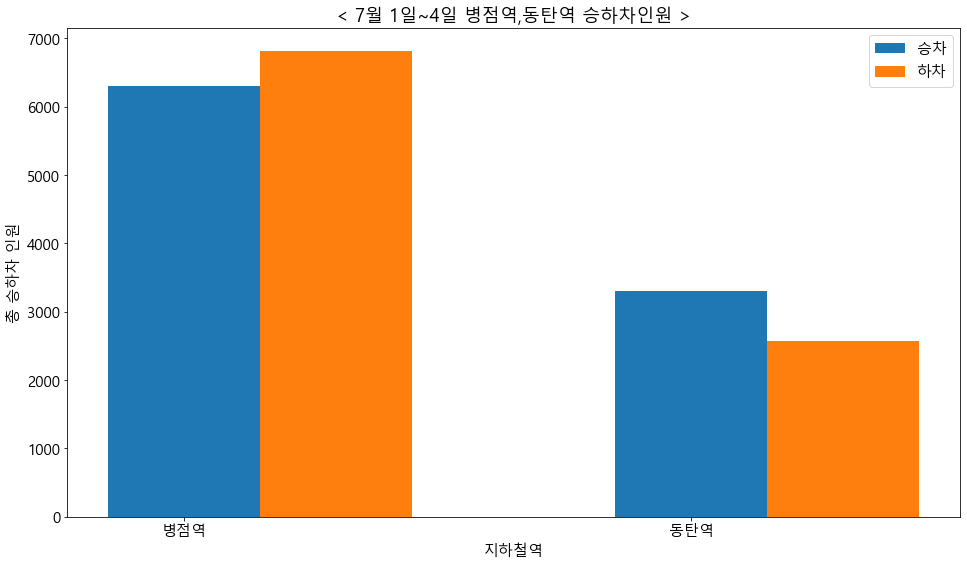

<Figure size 2304x1152 with 0 Axes>

In [104]:
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 15

on = [byeongjum_st_person, dongtan_st_person]
off = [byeongjum_st_person_off, dongtan_st_person_off]

label = ['병점역','동탄역']

x = np.arange(len(label))


plt.bar(x-0.0, on, label='승차', width=0.3)
plt.bar(x+0.3, off, label='하차', width=0.3)
plt.xticks(x, label)

plt.legend()
plt.xlabel('지하철역')
plt.ylabel('총 승하차 인원')
plt.title('< 7월 1일~4일 병점역,동탄역 승하차인원 >')
plt.figure(figsize=(32, 16))

plt.show() 

In [105]:
route_station = pd.read_csv('routestationinfo.csv')

In [106]:
#병점역,동탄역을 지나는 버스 노선 찾기 
byeongjum_line = route_station[route_station['station_nm'].isin([ i for i in byeongjum])]
dongtan_line =route_station[route_station['station_nm'].isin([ i for i in dongtan])]

In [107]:
#병점역 주변을 지나는 40개 버스 노선 
by_bus_line = byeongjum_line.drop_duplicates('pr_station_id', keep='first')
print(by_bus_line['pr_station_id'].shape)
by_bus_line = by_bus_line['pr_station_id']
by_bus_line = list(by_bus_line)
by_bus_line

(40,)


[233000077,
 233000128,
 233000130,
 233000134,
 233000141,
 233000252,
 233000268,
 233000275,
 233000277,
 233000280,
 233000281,
 241205012,
 241205013,
 241205017,
 241205018,
 241205022,
 241205023,
 241251001,
 241317002,
 241317004,
 241317006,
 241317008,
 241318002,
 241323001,
 241323002,
 241323004,
 241323005,
 241324001,
 241324002,
 241324003,
 241324004,
 241324005,
 241491002,
 241491003,
 241491004,
 241491005,
 241491008,
 241491009,
 241491010,
 241491011]

In [108]:
#동탄역 주변을 지나는 26개 버스 노선
dong_bus_line = dongtan_line.drop_duplicates('pr_station_id', keep='first')
print(dong_bus_line['pr_station_id'].shape)
dong_bus_line = dong_bus_line['pr_station_id'] 
dong_bus_line = list(dong_bus_line)
dong_bus_line

(26,)


[233000077,
 233000130,
 233000131,
 233000134,
 233000253,
 233000254,
 233000266,
 233000268,
 233000275,
 233000281,
 241205018,
 241205022,
 241317004,
 241317007,
 241317008,
 241317009,
 241317010,
 241317011,
 241318002,
 241323004,
 241324001,
 241324003,
 241491004,
 241491008,
 241491009,
 241491011]

In [109]:
#병점과 동탄 주변을 함께 지나는 18개 버스 노선
by_dong_bus_line =  list(set(by_bus_line).intersection(dong_bus_line))
by_dong_bus_line

[241491008,
 241324001,
 233000130,
 241324003,
 241491009,
 241491011,
 233000134,
 233000268,
 233000077,
 241317004,
 241491004,
 241317008,
 241318002,
 233000275,
 233000281,
 241205018,
 241323004,
 241205022]

In [110]:
# routestationinfo.csv 데이터와 stations_table.csv 데이터 합치기
data_from_csv = pd.read_csv("routestationinfo.csv")
data_from_csv2 = data_from_csv
data_station_csv = pd.read_csv("stations_table.csv")

In [111]:
from tqdm import tqdm

station_ids = list(data_from_csv['station_id'])
station_prids = list(data_station_csv['표준정류장ID'])

station_wgs84_latiude = list(data_station_csv['WGS84위도'])
station_wgs84_longitude = list(data_station_csv['WGS84경도'])

latitude = []
longitude = []

for i in tqdm(range(len(station_ids))):
  for j in range(len(station_prids)):
    if station_ids[i] == station_prids[j]:
      latitude.append(station_wgs84_latiude[j])
      longitude.append(station_wgs84_longitude[j])
      break

print(latitude[:3], longitude[:3])
data_from_csv2['latitude'] = latitude
data_from_csv2['longitude'] = longitude

data_from_csv2

100%|███████████████████████████████████████████████████████████████████████████| 37831/37831 [03:33<00:00, 177.09it/s]

[37.2327833, 37.23535, 37.2352667] [127.2101, 127.2090333, 127.21061670000002]


,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,latitude,longitude
0,65286,228000018,10-4,1,용인터미널,228001552,47634.0,37.232783,127.210100
1,65287,228000018,10-4,2,용인터미널(경유),277102443,NaN,37.235350,127.209033
2,65288,228000018,10-4,3,포브스병원,228000443,29439.0,37.235267,127.210617
3,65289,228000018,10-4,4,제일교회,228000665,29881.0,37.234300,127.213333
4,65290,228000018,10-4,5,라이프아파트,228000664,29457.0,37.231483,127.213767
...,...,...,...,...,...,...,...,...,...
37826,191750,241491011,38-1,63,신일해피트리후문,233002733,NaN,37.222650,126.978983
37827,191751,241491011,38-1,64,기배동행정복지센터,233002726,NaN,37.224000,126.983150
37828,191752,241491011,38-1,65,기안1통입구,233002959,NaN,37.225683,126.986250
37829,191753,241491011,38-1,66,배양2리,233002717,55455.0,37.226833,126.992067


In [112]:
data_from_csv2.to_csv("my_data_hwasung.csv", index=False)

In [113]:
#노선과 정류장 매핑
my_data_hwasung = pd.read_csv('my_data_hwasung.csv')
my_data_hwasung = my_data_hwasung.dropna()
my_data_hwasung

,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,latitude,longitude
0,65286,228000018,10-4,1,용인터미널,228001552,47634.0,37.232783,127.210100
2,65288,228000018,10-4,3,포브스병원,228000443,29439.0,37.235267,127.210617
3,65289,228000018,10-4,4,제일교회,228000665,29881.0,37.234300,127.213333
4,65290,228000018,10-4,5,라이프아파트,228000664,29457.0,37.231483,127.213767
5,65291,228000018,10-4,6,송담대,228000663,29464.0,37.228133,127.215267
...,...,...,...,...,...,...,...,...,...
37819,191743,241491011,38-1,56,안녕4통,233002234,55122.0,37.212633,126.982783
37820,191744,241491011,38-1,57,수원대학교,233000576,36204.0,37.214167,126.979150
37821,191745,241491011,38-1,58,와우2리,233000945,36194.0,37.215983,126.976317
37822,191746,241491011,38-1,59,와우농협앞,233001457,37529.0,37.218000,126.974633


In [114]:
by_bus_line = my_data_hwasung[my_data_hwasung['pr_station_id'].isin(i for i in by_bus_line)]
dong_bus_line = my_data_hwasung[my_data_hwasung['pr_station_id'].isin(i for i in dong_bus_line)]
by_dong_bus_line = my_data_hwasung[my_data_hwasung['pr_station_id'].isin(i for i in by_dong_bus_line)]

In [115]:
access_token = 'pk.eyJ1IjoiZGFlZG9sIiwiYSI6ImNqZGpqbmpnYzFscm8yd245YXM5MWQxeGgifQ.ACxKlSjUthNpixmVX2faMw'
view_options = {
    'center': [126.908, 37.132],
    'zoom': 12,
    'bearing': 0,
    'pitch': 60,
    'style': 'mapbox://styles/mapbox/dark-v9',
    'access_token': access_token
}

## 병점역 지나는 버스라인

In [116]:
grp = by_bus_line.groupby('pr_station_id')
data = []

for name, g_df in grp:
    g_df = g_df.sort_values('bus_line_no_seq')
    data.append({
        'path' : g_df[['longitude', 'latitude']].values.tolist()
    })
view = view_options.copy()
view['pitch'] = 0
view['zoom'] = 10

m = deckgl.Map(**view)
m.add(deckgl.PathLayer(data,
                       getColor=[255, 233, 0],
                       getWidth=100,
                       getPath='obj => obj.path',
                       opacity=0.01))
m.show()

## 동탄역 지나는 버스라인

In [117]:
grp = dong_bus_line.groupby('pr_station_id')
data = []

for name, g_df in grp:
    g_df = g_df.sort_values('bus_line_no_seq')
    data.append({
        'path' : g_df[['longitude', 'latitude']].values.tolist()
    })
view = view_options.copy()
view['pitch'] = 0
view['zoom'] = 10

m = deckgl.Map(**view)
m.add(deckgl.PathLayer(data,
                       getColor=[255, 233, 0],
                       getWidth=100,
                       getPath='obj => obj.path',
                       opacity=0.01))
m.show()

## 병점역 - 동탄역 지나는 버스노선

In [118]:
grp = by_dong_bus_line.groupby('pr_station_id')
data = []

for name, g_df in grp:
    g_df = g_df.sort_values('bus_line_no_seq')
    data.append({
        'path' : g_df[['longitude', 'latitude']].values.tolist()
    })
view = view_options.copy()
view['pitch'] = 0
view['zoom'] = 10

m = deckgl.Map(**view)
m.add(deckgl.PathLayer(data,
                       getColor=[255, 233, 0],
                       getWidth=100,
                       getPath='obj => obj.path',
                       opacity=0.01))
m.show()

# 결론 <a class="anchor" id="chapter3"></a>

## 3.1 요약 <a class="anchor" id="section_3_1"></a>

1. 화성시 읍면동별 인구수가 높은 곳인 '동탄4동', '향남읍', '봉담읍'에 버스정류장 추가 설치
2. 동탄신도시에서의 정류장 이용량 많기 때문에 버스 배차간격 줄이기
3. 많이 이용한 버스 정류장 주변에 학교, 편의시설, 아파트 있어서, 학교 편의시설, 아파트 주변에 버스 정류장 추가 설치
4. 병점역과 동탄역을 지나는 버스 노선 늘리기

## 3.2 한계점 <a class="anchor" id="section_3_2"></a>

1. 데이터가 크다보니깐 for문을 사용 할 때 많은 시간이 소요 됨
2. 결측값이 많아 분석하는데에 한계가 있음

In [276]:
TripChain = pd.read_csv('TripChain.csv')
TripChain.isna().sum()

암호화카드번호||'               0
'||트랜잭션ID||'             0
'||환승횟수||'               0
'||교통카드발행사ID||'          0
'||총이용객수||'              0
'||사용자구분||'              0
'||교통수단CD1||'           34
'||교통수단CD2||'       613273
'||교통수단CD3||'       950179
'||교통수단CD4||'      1032934
'||교통수단CD5||'      1045309
'||버스노선ID1||'        65601
'||버스노선ID2||'       711144
'||버스노선ID3||'       958733
'||버스노선ID4||'      1034162
'||버스노선ID5||'      1045668
'||차량ID1||'             34
'||차량ID2||'         613273
'||차량ID3||'         950179
'||차량ID4||'        1032934
'||차량ID5||'        1045309
'||총통행거리||'              0
'||총탑승시간||'              0
'||총소요시간||'              0
'||승차일시1||'             34
'||승차일시2||'         613273
'||승차일시3||'         950179
'||승차일시4||'        1032934
'||승차일시5||'        1045309
'||하차일시1||'          12118
'||하차일시2||'         615926
'||하차일시3||'         950797
'||하차일시4||'        1033038
'||하차일시5||'        1045322
'||최초승차일시||'             0
'||최종하차일시||'             0
'||승차역ID1||'            34
'

In [277]:
stations_table = pd.read_csv('stations_table.csv')
stations_table.isna().sum()

표준정류장ID          0
시군명           3270
정류소명          3270
정류소영문명        6563
정류소번호         6170
중앙차로여부        7652
관할관청          6558
위치           15491
WGS84위도       3270
WGS84경도       3270
모바일정류장ID      8843
이비카드정류장ID    12542
dtype: int64

In [278]:
routestationinfo = pd.read_csv('routestationinfo.csv')
routestationinfo.isna().sum()

seq                   0
pr_station_id         0
bus_line_no           0
bus_line_no_seq       0
station_nm            0
station_id            0
mobile_no          2350
dtype: int64